In [1]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [2]:
train_dir = "/kaggle/input/bangladeshi-crop-disease-dataset/Dataset/Train"
test_dir = "/kaggle/input/bangladeshi-crop-disease-dataset/Dataset/Test"
validation_dir ="/kaggle/input/bangladeshi-crop-disease-dataset/Dataset/Validation"

In [3]:
model1 = InceptionV3(include_top=False,input_shape=(224, 224, 3), weights='imagenet')

87910968/87910968 [==============================] - 0s 0us/step


In [4]:
input_shape = (224,224)

In [5]:
datagen_train = ImageDataGenerator(rescale=1./255,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  vertical_flip=False)


datagen_test = ImageDataGenerator(rescale=1./255)
datagen_val = ImageDataGenerator(rescale=1./255)



batch_size = 32
generator_train = datagen_train.flow_from_directory(directory=train_dir,
                                                    target_size=input_shape,
                                                    batch_size=batch_size,
                                                    shuffle=True)

generator_test = datagen_test.flow_from_directory(directory=test_dir,
                                                  target_size=input_shape,
                                                  batch_size=batch_size,
                                                  shuffle=False)

generator_val = datagen_val.flow_from_directory(directory=validation_dir,
                                                  target_size=input_shape,
                                                  batch_size=batch_size,
                                                  shuffle=False)


Found 9112 images belonging to 14 classes.
Found 2600 images belonging to 14 classes.
Found 1312 images belonging to 14 classes.


In [6]:
next(generator_train)[1]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0

In [7]:
conv_model = Model(inputs=model1.input, outputs=model1.output)

In [12]:
new_model = Sequential()
new_model.add(conv_model)
new_model.add(Flatten())
new_model.add(Dropout(0.5))
new_model.add(Dense(512, activation='relu'))
new_model.add(Dense(14, activation='softmax'))

In [13]:
tf. __version__

'2.12.0'

In [14]:
opt = tf.keras.optimizers.Adam(learning_rate=1e-4)
loss = 'categorical_crossentropy'
metrics = ['accuracy']

new_model.compile(optimizer= opt, loss=loss, metrics=metrics)

In [15]:


epochs = 100

steps_per_epoch = generator_train.n / batch_size
steps_val = generator_val.n / batch_size

Checkpoint = tf.keras.callbacks.ModelCheckpoint("inception.hdf5", monitor="val_accuracy", save_best_only= True, mode="max")

history = new_model.fit_generator(generator=generator_train,
                                  epochs=epochs,
                                  callbacks = [Checkpoint],
                                  steps_per_epoch=steps_per_epoch,
                                  validation_data=generator_val,
                                  validation_steps=steps_val)

/tmp/ipykernel_28/1737543989.py:14: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = new_model.fit_generator(generator=generator_train,


Epoch 1/100
284/284 [==============================] - 287s 859ms/step - loss: 0.5526 - accuracy: 0.8108 - val_loss: 0.2314 - val_accuracy: 0.9230
Epoch 2/100
284/284 [==============================] - 182s 639ms/step - loss: 0.2422 - accuracy: 0.9124 - val_loss: 0.3118 - val_accuracy: 0.8902
Epoch 3/100
284/284 [==============================] - 183s 640ms/step - loss: 0.1842 - accuracy: 0.9360 - val_loss: 0.1973 - val_accuracy: 0.9352
Epoch 4/100
284/284 [==============================] - 180s 631ms/step - loss: 0.1623 - accuracy: 0.9421 - val_loss: 0.2133 - val_accuracy: 0.9352
Epoch 5/100
284/284 [==============================] - 182s 637ms/step - loss: 0.1435 - accuracy: 0.9500 - val_loss: 0.1732 - val_accuracy: 0.9413
Epoch 6/100
284/284 [==============================] - 187s 657ms/step - loss: 0.1405 - accuracy: 0.9524 - val_loss: 0.1387 - val_accuracy: 0.9588
Epoch 7/100
284/284 [==============================] - 182s 638ms/step - loss: 0.1291 - accuracy: 0.9591 - val_loss: 0

KeyboardInterrupt: 

In [16]:
new_model=tf.keras.models.load_model('inception.hdf5')

In [17]:
Y_pred = new_model.predict(generator_test)
y_pred = np.argmax(Y_pred, axis=1)

82/82 [==============================] - 38s 450ms/step


In [18]:
class_labels = list(generator_test.class_indices.keys())

In [21]:
print(classification_report(generator_test.classes, y_pred, target_names=class_labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       238
           1       0.87      0.97      0.92       102
          10       1.00      1.00      1.00       200
          11       1.00      0.99      1.00       180
          12       1.00      1.00      1.00       223
          13       1.00      0.99      1.00       184
           2       1.00      1.00      1.00       232
           3       0.98      0.92      0.95       197
           4       0.99      0.99      0.99       200
           5       0.88      1.00      0.94        30
           6       0.99      0.97      0.98       200
           7       0.75      0.81      0.78       122
           8       0.86      0.94      0.90       297
           9       0.85      0.70      0.77       195

    accuracy                           0.95      2600
   macro avg       0.94      0.95      0.94      2600
weighted avg       0.95      0.95      0.95      2600



TypeError: 'History' object is not subscriptable

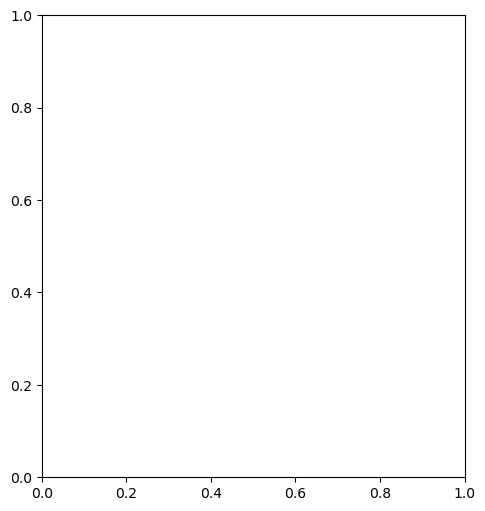

In [26]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.title("Loss")

plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="train_accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.title("Accuracy")

plt.show()

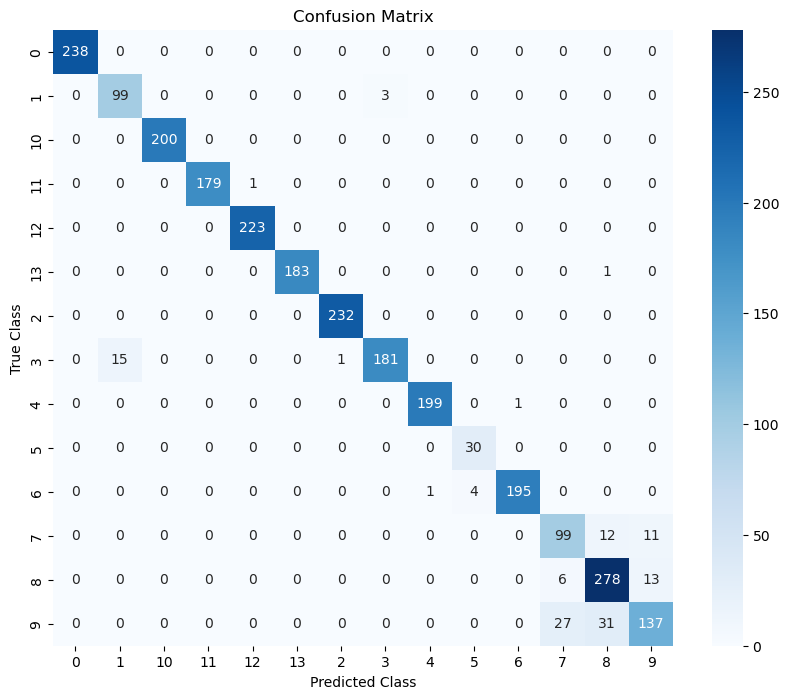

In [32]:
cm = confusion_matrix(generator_test.classes, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")
plt.show()

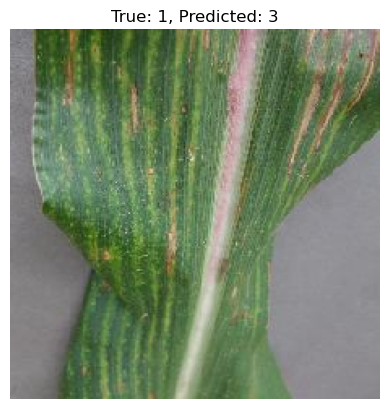

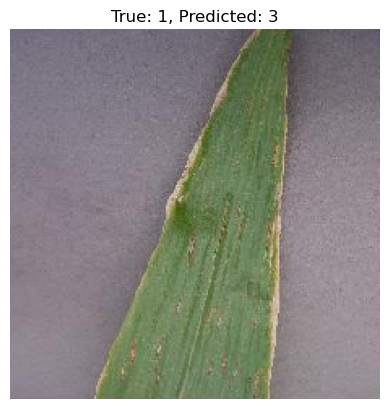

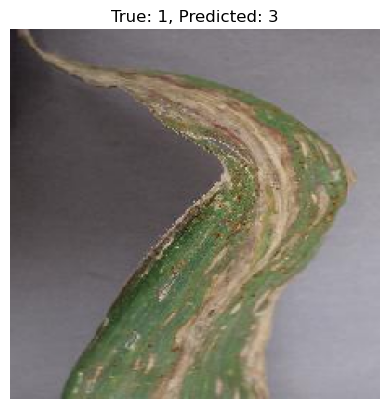

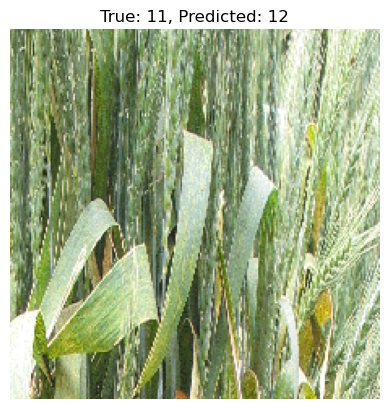

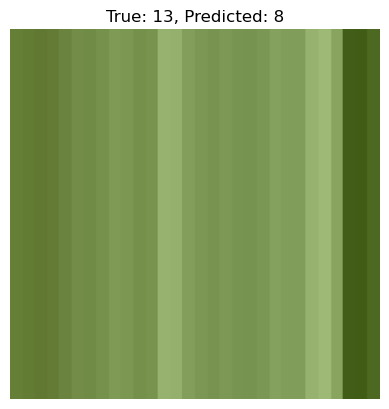

In [118]:
from tensorflow.keras.preprocessing.image import load_img
img_width, img_height= 228, 228
misclassified_images = []
for i in range(len(y_pred)):
    if y_pred[i] != generator_test.classes[i]:
        img_path = generator_test.filepaths[i]
        true_label = generator_test.classes[i]
        predicted_label = y_pred[i]
        misclassified_images.append((img_path, true_label, predicted_label))

num_display = 5
for img_path, true_label, predicted_label in misclassified_images[:num_display]:
    img = load_img(img_path, target_size=(img_width, img_height))
    plt.imshow(img)
    plt.title(f"True: {class_labels[true_label]}, Predicted: {class_labels[predicted_label]}")
    plt.axis('off')
    plt.show()